# Загрузка Pandas и очистка данных

In [2328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2329]:
df = pd.read_csv('main_task.csv')

In [2330]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [2331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Приведем имена колонок к нормальному виду

In [2332]:
df.columns=['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'reviews_cnt', 'reviews', 'ta_url', 'ta_id']


### Общие наблюдения и очистки

In [2333]:
df.describe(include='all')

,restaurant_id,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id
count,40000,40000,30717,40000.000000,40000.000000,26114,37457.000000,40000,40000,40000
unique,11909,31,9007,NaN,NaN,3,NaN,33516,39980,39980
top,id_227,London,['Italian'],NaN,NaN,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7342803
freq,18,5757,1032,NaN,NaN,18412,NaN,6471,2,2
mean,NaN,NaN,NaN,3676.028525,3.993037,NaN,124.825480,NaN,NaN,NaN
std,NaN,NaN,NaN,3708.749567,0.668417,NaN,295.666352,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,973.000000,3.500000,NaN,9.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2285.000000,4.000000,NaN,33.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,5260.000000,4.500000,NaN,115.000000,NaN,NaN,NaN


Есть неуникальные _restaurant_id_ и _ta_id_

In [2334]:
df[df.restaurant_id==df.restaurant_id.value_counts().index[0]].head(3)



,restaurant_id,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id
1065,id_227,Luxembourg,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",228.0,4.0,$$ - $$$,21.0,"[['Nice little Lebanese restaurant', 'Great fo...",/Restaurant_Review-g190356-d10275783-Reviews-K...,d10275783
4727,id_227,Bratislava,"['Healthy', 'European', 'Mediterranean', 'Vege...",228.0,4.0,$$ - $$$,122.0,"[['Great fish (African sharptooth catfish)', '...",/Restaurant_Review-g274924-d4009959-Reviews-Me...,d4009959
6237,id_227,Athens,"['European', 'Greek', 'Mediterranean']",228.0,4.5,$$ - $$$,220.0,"[['Spectacular view and food', 'Great view'], ...",/Restaurant_Review-g189400-d1898490-Reviews-Ol...,d1898490


Одинаковый _restaurant_id_ встречается в разных городах и имеет разный _ta_id_. Удалим эту колонку.

In [2335]:
df.drop(["restaurant_id"], axis=1, inplace=True)

In [2336]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.ta_id==df.ta_id.value_counts().index[0]].head(3))

city                 cuisine_style  ranking  rating price_range  \
22924  Madrid  ['Spanish', 'Mediterranean']  2361.0   4.5     $$ - $$$     
36275  Madrid  ['Spanish', 'Mediterranean']  2469.0   4.5     $$ - $$$     

       reviews_cnt                                          reviews  \
22924  16.0         [['The real codido madrileño'], ['03/31/2017']]   
36275  16.0         [['The real codido madrileño'], ['03/31/2017']]   

                                                                    ta_url  \
22924  /Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html   
36275  /Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html   

          ta_id  
22924  d7342803  
36275  d7342803  


Судя по-всему дублирующиеся _ta_id_ отличаются только по _ranking_. Попробуем сгрупировать, при этом ранк возьмется случайно, что не страшно, т.к. дублей всего 20

In [2337]:
df.drop_duplicates(subset=['city', 'cuisine_style', 'rating','price_range', 'reviews_cnt', 'reviews', 'ta_url', 'ta_id'], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           39980 non-null  object 
 1   cuisine_style  30701 non-null  object 
 2   ranking        39980 non-null  float64
 3   rating         39980 non-null  float64
 4   price_range    26101 non-null  object 
 5   reviews_cnt    37437 non-null  float64
 6   reviews        39980 non-null  object 
 7   ta_url         39980 non-null  object 
 8   ta_id          39980 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.7+ MB


Теперь количество строк совпадает с уникальными значениями _ta_id_ т.е. его можно использовать как первичный ключ для дальнейших очисток

### Вынос общих функций

In [2338]:
import ast

def text_to_dct(json_text):
    #return json.loads(json_text.replace('\'','\"')) This does not work for tricky cases with " and ' used for quotes in parallel
    return ast.literal_eval(json_text.replace('nan','\'\''))

### Исследование  price_range

In [2339]:
df.price_range.value_counts()

$$ - $$$    18402
$            6276
$$$$         1423
Name: price_range, dtype: int64

Это ординальный признак, но есть пропуски. Преобразуем в числа.

In [2340]:
dct = {'$$ - $$$': 2, '$': 1, '$$$$': 3}
df.price_range.replace(to_replace=dct, inplace=True)

Пропуски заполним наиболее частым значением (2), т.к. оно более вероятно

In [2341]:
df.price_range.fillna(2, inplace=True)

### Исследование и очистка city

In [2342]:
df.city.describe()

count      39980
unique        31
top       London
freq        5757
Name: city, dtype: object

In [2343]:
df.city.value_counts()

London        5757
Paris         4897
Madrid        3088
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

Городов не много, превратим их в числовые признаки 

In [2344]:
df = pd.concat([df, pd.get_dummies(df.city)], axis = 1)

### Ranking (понял посмотрев анализ в baseline на Kaggle) ###

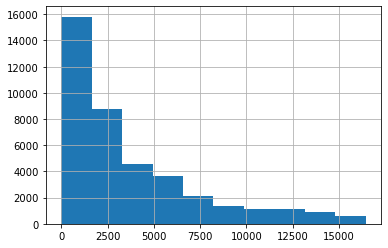

In [2345]:
df["ranking"].hist()

In [2346]:
def process_ranking_by_city(df, ranking_col, city_col):
    by_city_ranking_stats = df.groupby(city_col).agg({ranking_col : ['min', 'max']}).reset_index()
    by_city_ranking_stats.columns = [city_col, "ranking_min", "ranking_max"]
    df = df.merge(by_city_ranking_stats, how="left", on=city_col)
    df["ranking_norm"] = (df[ranking_col] - df.ranking_min) / (df.ranking_max - df.ranking_min)
    df.drop(["ranking_min", "ranking_max"], axis = 1, inplace = True)
    return df
df = process_ranking_by_city(df, "ranking", "city")


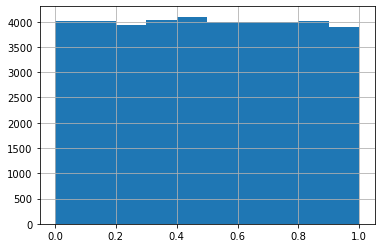

In [2347]:
df["ranking_norm"].hist()

### Исследование и очистка cuisine

Сделаем вспомогательный датафрейм

In [2348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39980 entries, 0 to 39979
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           39980 non-null  object 
 1   cuisine_style  30701 non-null  object 
 2   ranking        39980 non-null  float64
 3   rating         39980 non-null  float64
 4   price_range    39980 non-null  float64
 5   reviews_cnt    37437 non-null  float64
 6   reviews        39980 non-null  object 
 7   ta_url         39980 non-null  object 
 8   ta_id          39980 non-null  object 
 9   Amsterdam      39980 non-null  uint8  
 10  Athens         39980 non-null  uint8  
 11  Barcelona      39980 non-null  uint8  
 12  Berlin         39980 non-null  uint8  
 13  Bratislava     39980 non-null  uint8  
 14  Brussels       39980 non-null  uint8  
 15  Budapest       39980 non-null  uint8  
 16  Copenhagen     39980 non-null  uint8  
 17  Dublin         39980 non-null  uint8  
 18  Edinbu

In [2349]:
cuisines = df[["ta_id","cuisine_style"]]

In [2350]:

cuisines.cuisine_style.fillna('["Unknown"]', inplace=True)
cuisines.cuisine_style = cuisines.cuisine_style.apply(text_to_dct)

Преобразуем массив кухонь в отдельный ряд на кухню для каждого ресторана

In [2351]:
cuisines = cuisines.explode("cuisine_style")
cuisines.describe()

,ta_id,cuisine_style
count,104843,104843
unique,39980,126
top,d7231902,Vegetarian Friendly
freq,21,11183


Число уникальных кухонь - 126, но без учета добавленной Unknown - 125

Самые популярные кухни:

In [2352]:
cuisines.cuisine_style.value_counts()


Vegetarian Friendly    11183
European               10056
Unknown                 9279
Mediterranean           6271
Italian                 5963
                       ...  
Xinjiang                   1
Salvadoran                 1
Yun                        1
Latvian                    1
Burmese                    1
Name: cuisine_style, Length: 126, dtype: int64

Среднее число кухонь на ресторан:

In [2353]:
cuisines.groupby("ta_id").nunique().mean()

ta_id            1.000000
cuisine_style    2.622386
dtype: float64

Добавим фичу с колличеством кухонь на ресторан в основной датасет

In [2354]:
cuisine_cnt_df = cuisines.groupby("ta_id").nunique()
cuisine_cnt_df.columns=["ta_id","cuisines_cnt"]
cuisine_cnt_df = cuisine_cnt_df[["cuisines_cnt"]].reset_index()
cuisine_cnt_df

,ta_id,cuisines_cnt
0,d10001421,1
1,d10002410,3
2,d10003044,1
3,d10003108,1
4,d10003120,2
...,...,...
39975,d9998177,1
39976,d9998222,1
39977,d9999085,5
39978,d9999269,3


In [2355]:
cuisine_cnt_df = cuisines.groupby("ta_id").nunique()
cuisine_cnt_df.columns=["ta_id","cuisines_cnt"]
cuisine_cnt_df = cuisine_cnt_df[["cuisines_cnt"]].reset_index()
cuisine_cnt_df
df=df.merge(cuisine_cnt_df, how="left", on="ta_id")
df.head(3)

,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id,Amsterdam,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,ranking_norm,cuisines_cnt
0,Paris,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,...,0,1,0,0,0,0,0,0,0.398126,3
1,Stockholm,NaN,1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,...,0,0,0,0,1,0,0,0,0.623630,1
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,...,0,0,0,0,0,0,0,0,0.021407,7


Развернем данные по кухням, взяв только топ 25\* кухонь. 

\*Проверено опытным путем что большее количество уже незначительно влияет на ошибку модели

In [2356]:
top_kitchens = cuisines.cuisine_style.value_counts()[:25].index 
cuisines.cuisine_style=cuisines["cuisine_style"].apply(lambda c: c if c in top_kitchens else 'other')

In [2357]:
cuisines=pd.get_dummies(cuisines,columns=["cuisine_style"]).groupby("ta_id").sum()

In [2358]:
cuisines.rename(columns={"ta_id":"to_id"})

,cuisine_style_American,cuisine_style_Asian,cuisine_style_Bar,cuisine_style_British,cuisine_style_Cafe,cuisine_style_Central European,cuisine_style_Chinese,cuisine_style_European,cuisine_style_Fast Food,cuisine_style_French,...,cuisine_style_Pizza,cuisine_style_Portuguese,cuisine_style_Pub,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other
ta_id,,,,,,,,,,,,,,,,,,,,,
d10001421,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
d10002410,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
d10003044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
d10003108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
d10003120,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d9998177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
d9998222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
d9999085,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


Смерджим с основным датасетом

In [2359]:
df=df.merge(cuisines, how="left", on="ta_id")
df.drop("cuisine_style", axis=1, inplace=True)
df.head(3)

,city,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id,Amsterdam,Athens,...,cuisine_style_Pizza,cuisine_style_Portuguese,cuisine_style_Pub,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other
0,Paris,5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stockholm,1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,...,0,0,0,0,0,0,1,0,0,0
2,London,353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,...,0,0,0,0,0,1,0,1,1,1


In [2360]:
## Полная секция обработки cuisine для Kagle, тут не применяется ###

import ast

def text_to_dct(json_text):
    return ast.literal_eval(json_text.replace('nan','\'\''))

def process_cuisines_count(cuisines, id_col):
    cuisine_cnt_df = cuisines.groupby(id_col).nunique()
    cuisine_cnt_df.columns=[id_col,"cuisines_cnt"]
    cuisine_cnt_df = cuisine_cnt_df[["cuisines_cnt"]].reset_index()
    #cuisine_cnt_df.columns=["ID_TA","Number of Cuisines"]
    #df=df.merge(cuisine_cnt_df, how="left", on="ID_TA")
    return cuisine_cnt_df

def process_cuisines_top_dummies(cuisines, id_col, style_col):
    top_kitchens = cuisines[style_col].value_counts()[:25].index 
    cuisines[style_col]=cuisines[style_col].apply(lambda c: c if c in top_kitchens else 'other')
    cuisines = pd.get_dummies(cuisines,columns=[style_col]).groupby(id_col).sum().reset_index()    
    return cuisines
    
def process_cuisines_parse_explode(df, id_col, style_col):
    cuisines = df[[id_col,style_col]]    
    cuisines[style_col].fillna('["Unknown"]', inplace=True)
    cuisines[style_col] = cuisines[style_col].apply(text_to_dct)
    cuisines = cuisines.explode(style_col)
    return cuisines

def process_cuisines(df, id_col, style_col):
    cuisines = process_cuisines_parse_explode(df, id_col, style_col)    
    cuisine_cnt_df = process_cuisines_count(cuisines, id_col)
    cuisine_top_dummies = process_cuisines_top_dummies(cuisines, id_col, style_col)
    df=df.merge(cuisine_cnt_df, how="left", on=id_col)
    df=df.merge(cuisine_top_dummies, how="left", on=id_col)
    return df



### Работа с отзывами - Даты

In [2361]:
df.sample(5)

,city,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id,Amsterdam,Athens,...,cuisine_style_Pizza,cuisine_style_Portuguese,cuisine_style_Pub,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other
1063,London,8637.0,4.0,2.0,43.0,"[[""A review of Moin, one of Maroush Express's....",/Restaurant_Review-g186338-d720006-Reviews-Mar...,d720006,0,0,...,0,0,0,0,0,0,0,0,0,3
28264,Milan,1222.0,4.0,2.0,322.0,"[['Authentic with a little nonna cooking 💕', '...",/Restaurant_Review-g187849-d1898502-Reviews-Qu...,d1898502,0,0,...,1,0,0,0,0,0,0,0,1,0
39819,Warsaw,60.0,4.5,2.0,277.0,"[['Amazing food', 'Phenomenal!'], ['01/10/2018...",/Restaurant_Review-g274856-d3537921-Reviews-Dz...,d3537921,0,0,...,0,0,0,0,0,0,0,1,1,0
12354,London,14610.0,3.0,2.0,11.0,"[['Eat', 'Quick stop for lunch'], ['02/21/2017...",/Restaurant_Review-g186338-d5121450-Reviews-Ea...,d5121450,0,0,...,0,0,0,0,0,0,1,0,0,0
23277,Stockholm,609.0,3.5,2.0,137.0,[['Worth a visit at this “local” restaurant......,/Restaurant_Review-g189852-d7285976-Reviews-39...,d7285976,0,0,...,0,0,0,0,0,0,0,0,1,1


In [2362]:
reviews = df[["ta_id","reviews"]]
reviews.reviews = reviews.reviews.apply(text_to_dct)


Анализируем сколько бывает отзывов

In [2363]:
reviews.reviews.apply(lambda r: len(r[0])).value_counts(),reviews.reviews.apply(lambda r: len(r[1])).value_counts()

(2    28961
 0     6465
 1     4554
 Name: reviews, dtype: int64,
 2    28961
 0     6465
 1     4554
 Name: reviews, dtype: int64)

Видно что количество дат отзывов скорее всего совпадает с количеством отзывов, несмотря на то что хранится в отдельном массиве. Нужен как анализ конкретных ревью, так и их дат. Вынесем в отдельные колонки

In [2364]:
reviews["review_2"]=reviews.reviews.apply(lambda r: r[0][0] if len(r[0])>0 else None)
reviews["review_2_date"]=pd.to_datetime(reviews.reviews.apply(lambda r: r[1][0] if len(r[1])>0 else None))
reviews["review_1"]=reviews.reviews.apply(lambda r: r[0][1] if len(r[0])>1 else None)
reviews["review_1_date"]=pd.to_datetime(reviews.reviews.apply(lambda r: r[1][1] if len(r[1])>1 else None))
reviews.drop(["reviews"], axis=1, inplace=True)
reviews.describe()


,ta_id,review_2,review_2_date,review_1,review_1_date
count,39980,33515,33515,28961,28961
unique,39980,28613,1880,24756,1951
top,d7394137,Excellent,2018-01-07 00:00:00,Excellent,2018-01-03 00:00:00
freq,1,118,486,86,194
first,NaN,NaN,2004-04-21 00:00:00,NaN,2007-11-14 00:00:00
last,NaN,NaN,2018-02-26 00:00:00,NaN,2018-02-26 00:00:00


In [2365]:

print("Максимальное количество дней между ревью", (reviews.review_2_date-reviews.review_1_date).dt.days.max())

Максимальное количество дней между ревью 3207.0


**Наблюдение**: Вероятно данные вбивались некорректно, т.к. самый старый второй отзыв раньше самого старого первого. Постараемся удалить выбросы

На основе дат введем два признака: Сколько прошло с последнего отзыва и как часто люди ревьюят ресторан. 

In [2366]:
today=max(reviews.review_1_date.max(),reviews.review_2_date.max())
reviews["days_since_last_review"]=(today-reviews[["review_1_date","review_2_date"]].max(axis=1)).dt.days
reviews["days_between_reviews"]=(np.abs(reviews.review_2_date - reviews.review_1_date)).dt.days

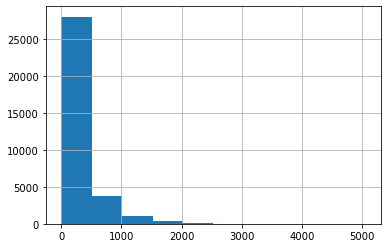

In [2367]:
reviews.days_since_last_review.hist()

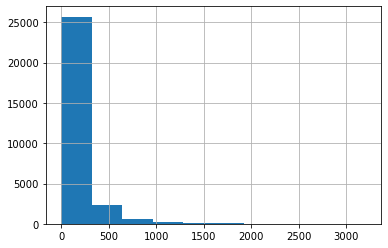

In [2368]:
reviews.days_between_reviews.hist()

Установим порог по 10й персентили в этих признаках и заменим запороговые значения максимумом (гипотеза чем больше дней тем "хуже" ревью)

In [2369]:
days_between_reviews_threshold = reviews.days_between_reviews.quantile(0.90)
reviews[reviews.days_between_reviews>days_between_reviews_threshold].days_between_reviews = days_between_reviews_threshold

days_since_last_review_threshold = reviews.days_since_last_review.quantile(0.90)
reviews[reviews.days_since_last_review>days_since_last_review_threshold].days_since_last_review = days_since_last_review_threshold

Также заменим пропуски теми же пороговыми значениями 

In [2370]:
reviews.days_between_reviews.fillna(days_between_reviews_threshold, inplace=True)
reviews.days_since_last_review.fillna(days_since_last_review_threshold, inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39980 entries, 0 to 39979
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ta_id                   39980 non-null  object        
 1   review_2                33515 non-null  object        
 2   review_2_date           33515 non-null  datetime64[ns]
 3   review_1                28961 non-null  object        
 4   review_1_date           28961 non-null  datetime64[ns]
 5   days_since_last_review  39980 non-null  float64       
 6   days_between_reviews    39980 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 2.4+ MB


### Работа с отзывами - Анализ слов

In [2371]:
(reviews.review_1+' '+reviews.review_2).str.split(expand=True).stack().value_counts()[0:40]

and           7159
food          6332
Great         5846
Good          4582
in            4300
a             3883
good          3704
the           3452
for           3364
place         2994
Nice          2590
service       2225
Very          2120
A             2103
to            2020
of            1948
great         1919
restaurant    1905
with          1801
Excellent     1786
but           1732
nice          1466
Best          1419
food,         1374
lunch         1282
-              999
Lovely         990
Delicious      988
Food           970
best           942
very           936
The            920
Amazing        887
at             845
Italian        814
friendly       804
little         785
not            762
pizza          751
atmosphere     710
dtype: int64

In [2372]:
extremely_positive_keywords = '|'.join(["great", "very", "excellent", "delicious", "amazing", "best", "lovely"])

In [2373]:
reviews["extremely_positive_keywords"]=(reviews.review_1.str.lower().str.contains(extremely_positive_keywords) | reviews.review_2.str.lower().str.contains(extremely_positive_keywords)).apply(lambda v: 1 if v else 0)

In [2374]:
df=df.merge(reviews[["ta_id","days_since_last_review","days_between_reviews", "extremely_positive_keywords"]], how="left", on="ta_id")
df.drop("reviews", axis=1, inplace=True)
df.head(3)

,city,ranking,rating,price_range,reviews_cnt,ta_url,ta_id,Amsterdam,Athens,Barcelona,...,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other,days_since_last_review,days_between_reviews,extremely_positive_keywords
0,Paris,5570.0,3.5,2.0,194.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,...,0,0,0,0,0,0,0,57.0,41.0,0
1,Stockholm,1537.0,4.0,2.0,10.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,...,0,0,0,1,0,0,0,235.0,382.0,1
2,London,353.0,4.5,3.0,688.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,...,0,0,1,0,1,1,1,49.0,2.0,0


In [2375]:
def process_reviews_to_columns(df, id_col, reviews_col):
    reviews = df[[id_col, reviews_col]].copy()
    reviews[reviews_col]=reviews[reviews_col].fillna("[[],[]]")
    reviews_as_array = reviews[reviews_col].apply(text_to_dct)
    reviews["review_2"]=reviews_as_array.apply(lambda r: r[0][0] if len(r[0])>0 else None)
    reviews["review_2_date"]=pd.to_datetime(reviews_as_array.apply(lambda r: r[1][0] if len(r[1])>0 else None))
    reviews["review_1"]=reviews_as_array.apply(lambda r: r[0][1] if len(r[0])>1 else None)
    reviews["review_1_date"]=pd.to_datetime(reviews_as_array.apply(lambda r: r[1][1] if len(r[1])>1 else None))
    return reviews

def process_reviews_add_dates_features(reviews):
    today=max(reviews.review_1_date.max(),reviews.review_2_date.max())
    reviews["days_since_last_review"]=(today-reviews[["review_1_date","review_2_date"]].max(axis=1)).dt.days
    reviews["days_between_reviews"]=(np.abs(reviews.review_2_date - reviews.review_1_date)).dt.days
    return reviews

def process_reviews_replace_date_outliers_and_na(reviews):
    days_between_reviews_threshold = reviews.days_between_reviews.quantile(0.90)
    reviews[reviews.days_between_reviews>days_between_reviews_threshold].days_between_reviews = days_between_reviews_threshold

    days_since_last_review_threshold = reviews.days_since_last_review.quantile(0.90)
    reviews[reviews.days_since_last_review>days_since_last_review_threshold].days_since_last_review = days_since_last_review_threshold

    reviews.days_between_reviews.fillna(days_between_reviews_threshold, inplace=True)
    reviews.days_since_last_review.fillna(days_since_last_review_threshold, inplace=True)
    return reviews

def process_reviews_add_positive_feature(reviews):
    extremely_positive_keywords = '|'.join(["great", "very", "excellent", "delicious", "amazing", "best", "lovely"])
    reviews["extremely_positive_keywords"]=(reviews.review_1.str.lower().str.contains(extremely_positive_keywords) | reviews.review_2.str.lower().str.contains(extremely_positive_keywords)).apply(lambda v: 1 if v else 0)
    return reviews

def process_reviews(df, id_col, reviews_col):
    reviews = process_reviews_to_columns(df, id_col, reviews_col)    
    reviews = process_reviews_add_dates_features(reviews)
    reviews = process_reviews_replace_date_outliers_and_na(reviews)
    reviews = process_reviews_add_positive_feature(reviews)
    return df.merge(reviews[[id_col,"days_since_last_review","days_between_reviews", "extremely_positive_keywords"]], how="left", on=id_col)


In [2376]:
df = df.drop([c for c in df.columns if df[c].dtype == 'object'], axis = 1) # Drop non-numbers

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [2377]:
df["reviews_cnt"].fillna(df["reviews_cnt"].median(), inplace=True)

In [2378]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop([ 'rating'], axis = 1)
y = df['rating']

In [2379]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [2380]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [2381]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [2382]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [2383]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20658229114557278
